# Project 4 - Wrangle and Analyse Data

In this project, I need to wrangle and analyze tweets archive from [WeRateDogs](https://twitter.com/dog_rates). 

They have sent Twitter's archive until August 1, 2017, with over 5000+ tweets. Udacity filtered only those tweets that were rated and were made available in a CSV file. They also used a neural network to classify the breed of the dogs based on the images in the tweet and made them available in a file that I had to download programmatically. It was also requested that the count of retweets and favorites gathered from Twitter API.

Based on this data, it was requested to find and clean at least 8 quality issues and 2 tidiness issues. Also was requested to produce at least 3 insights and 1 visualization over the data.

## Table of Contents
- [Gather](#Gather)
- [Assess](#Assess)
- [Clean](#Clean)
- [Explore](#Explore)
- [Conclusion](#Conclusion)

In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tweepy

%matplotlib inline

# Configures pandas to do not truncate the columns
pd.set_option('display.max_colwidth', None)

---
## Gather

First, let's read the file that was provided.

### Read File with Twitter Information

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Download Image Preditions File

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'w') as file:
    file.write(response.text)

In [3]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Download Additional Twitter Data from API

In [5]:
# Remove this keys before submiting
consumer_key = ''
consumer_secret = ''

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Configures the library to wait when a rate limit error occurs
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive_enhanced.tweet_id:
        try:
            result = api.get_status(tweet_id, tweet_mode='extended')
            file.write(json.dumps(result._json) + '\n')
        except Exception as e:
            print(f'Error while getting json data from tweet {tweet_id} with error: {e}')

Error while getting json data from tweet 888202515573088257 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 873697596434513921 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 872668790621863937 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 872261713294495745 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 869988702071779329 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 866816280283807744 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 861769973181624320 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 856602993587888130 with error: [{'c

Rate limit reached. Sleeping for: 105


Error while getting json data from tweet 754011816964026368 with error: [{'code': 144, 'message': 'No status found with that ID.'}]
Error while getting json data from tweet 680055455951884288 with error: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 216


In [4]:
statuses = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        statuses.append(json.loads(line))

In [5]:
tweet_json = pd.json_normalize(statuses)
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",False,"[0, 138]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## Assess

In [6]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Reggie. He's going for the world record. Must concentrate. Focus up pup. 11/10 we all believe in you Reggie https://t.co/h3AWz4AzuC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103322386432/photo/1,11,10,Reggie,None,None,None,None
2006,672267570918129665,NaN,NaN,2015-12-03 04:14:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you accidentally open up the front facing camera. 10/10 https://t.co/jDXxZARQIZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672267570918129665/photo/1,10,10,None,None,None,None,None
1376,701805642395348998,NaN,NaN,2016-02-22 16:27:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Please pray for this pupper. Nothing wrong with her she just can't stop getting hit with banana peels. 11/10 https://t.co/8sdVenUAqr,NaN,NaN,NaN,https://vine.co/v/ivV6Y37mH5Z,11,10,None,None,None,pupper,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836334096384/photo/1,9,10,Jeph,None,None,None,None
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652199309312/video/1,12,10,None,None,None,None,None


In [7]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

`name`, `doggo`, `floofer`, `pupper`, and `puppo` columns have an invalid null value (the python string **None**). 

`doggo`, `floofer`, `pupper`, and `puppo` are classifications of a dog and should be in one column.

`timestamp` is not in datetime format.

We have 59 entries without images (indicated by `expanded_urls`) that need to be removed.

In [8]:
twitter_archive_enhanced.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

We can see that `source` has two pieces of information in one column, the link of the source and the text of the source. Because we do not need the link of the source, we can extract the text and put it in the source.

In [9]:
twitter_archive_enhanced[~twitter_archive_enhanced.retweeted_status_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveT

181 retweets were not correctly removed. So we need to remove it.

In [10]:
twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [11]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [12]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [13]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


There is some decimal value in the numerator and it was not parsed correctly to `rating_numerator`.

Some records have 24/7 incorrectly converted as a rating.

In [14]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [15]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a hr

If a record has more than one fraction, the last one is usually the rating. The code used to parse these ratings consider the first fraction as being the rating.

Some numerators and denominators are huge, but when they are divided, the rating is acceptable.

In [16]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('\d+/\d+/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


The record with tweet_id 832088576586297345 is not a rating record, instead, it's a date.

In [17]:
twitter_archive_enhanced[twitter_archive_enhanced.name != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


In [18]:
list(twitter_archive_enhanced.name.value_counts().index)

['None',
 'a',
 'Charlie',
 'Cooper',
 'Oliver',
 'Lucy',
 'Tucker',
 'Lola',
 'Penny',
 'Bo',
 'Winston',
 'the',
 'Sadie',
 'Bailey',
 'Toby',
 'Buddy',
 'Daisy',
 'an',
 'Scout',
 'Jack',
 'Leo',
 'Rusty',
 'Stanley',
 'Milo',
 'Oscar',
 'Bella',
 'Jax',
 'Koda',
 'Dave',
 'Finn',
 'Alfie',
 'Phil',
 'Chester',
 'Sunny',
 'Bentley',
 'Larry',
 'very',
 'Louis',
 'Oakley',
 'Gus',
 'George',
 'Sammy',
 'Maddie',
 'Bear',
 'Ruby',
 'Carl',
 'Gary',
 'Brody',
 'Maggie',
 'just',
 'Gerald',
 'quite',
 'Sophie',
 'Sampson',
 'Hank',
 'Reggie',
 'Derek',
 'Jerry',
 'Maximus',
 'Shadow',
 'Walter',
 'Clarence',
 'Jeffrey',
 'Clark',
 'one',
 'Bruce',
 'Dexter',
 'Winnie',
 'Chip',
 'Cassie',
 'Archie',
 'Duke',
 'Loki',
 'Reginald',
 'Scooter',
 'Beau',
 'Luna',
 'Moose',
 'Riley',
 'Boomer',
 'Reese',
 'Malcolm',
 'Louie',
 'Samson',
 'Waffles',
 'Zeke',
 'Ted',
 'Frankie',
 'Earl',
 'Wilson',
 'Nala',
 'Rosie',
 'Ellie',
 'Otis',
 'Paisley',
 'Zoey',
 'Sebastian',
 'Klevin',
 'Wyatt',
 '

There are some invalid `name` that starts with a lowercase letter (like `one`, `an`, `not`, `a`, etc.)

In [19]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('doggo')].query('doggo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1",14,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836648149003485187/photo/1,11,10,None,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,NaN,NaN,NaN,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495989305348/video/1,11,10,None,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520834629632/video/1,11,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806121881602/p

In [20]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('floofer')].query('floofer == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('pupper')].query('pupper == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595344535552/photo/1,13,10,Gary,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,None,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746056683365994496/photo/1,https://twitter.com/dog_rates/status/746056683365994496/photo/1",11,10,Arlen,None,None,None,None
1093,737310737551491075,NaN,NaN,2016-05-30 15:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737310737551491075/video/1,13,10,None,None,None,None,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013974974464/photo/1,12,10,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r",NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1",12,10,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This golden is happy to refute the soft mouth 

In [22]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('puppo')].query('puppo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275196170240/photo/1,13,10,Venti,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871879754684805121/photo/1,https://twitter.com/dog_rates/status/871879754684805121/photo/1",13,10,Lassie,None,None,None,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866686824827068416/photo/1,https://twitter.com/dog_rates/status/866686824827068416/photo/1",12,10,Lili,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284874571778/photo/1,13,10,Lucy,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884734976000/video/1,12,10,Duke,None,None,None,None


Some variations of the classification in the stages of the dogs (like plural) were not correctly parsed.

In [23]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True
310,671542985629241344,https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg,1,Shetland_sheepdog,0.980339,True,collie,0.006693,True,papillon,0.006157,True
457,674781762103414784,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,ocarina,0.148975,False,hamster,0.068985,False,wool,0.031728,False
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
595,679511351870550016,https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg,1,Chihuahua,0.761972,True,black-footed_ferret,0.150605,False,squirrel_monkey,0.028148,False


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are some missing records in the `image_predictions` table. We can not do anything in this case because we do not access to the model used to evaluate the images.

In [25]:
tweet_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
872,Fri Jul 29 22:53:27 +0000 2016,759159934323924993,759159934323924993,RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO7HEQGA,False,"[0, 64]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,Mon Dec 19 23:06:23 +0000 2016,810984652412424192,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,False,"[0, 143]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,Tue Jun 28 04:31:44 +0000 2016,747648653817413632,747648653817413632,This is Keurig. He apparently headbutts other dogs to greet them. Not cool Keurig. So fluffy tho 12/10 https://t.co/zexdr61Q5M,False,"[0, 127]","<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,Thu Jun 02 00:32:39 +0000 2016,738166403467907072,738166403467907072,This is Axel. He's a professional leaf catcher. 12/10 gifted af https://t.co/P8bgOMMTRs,False,"[0, 63]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,Mon Mar 14 23:19:03 +0000 2016,709519240576036864,709519240576036864,This is Vince. He's a Gregorian Flapjeck. White spot on legs almost looks like another dog (whoa). 9/10 rad as hell https://t.co/aczGAV2dK4,False,"[0, 139]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Columns: 322 entries, created_at to place.bounding_box.coordinates
dtypes: bool(15), float64(74), int64(9), object(224)
memory usage: 5.5+ MB


In [27]:
list(tweet_json)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'entities.hashtags',
 'entities.symbols',
 'entities.user_mentions',
 'entities.urls',
 'entities.media',
 'extended_entities.media',
 'user.id',
 'user.id_str',
 'user.name',
 'user.screen_name',
 'user.location',
 'user.description',
 'user.url',
 'user.entities.url.urls',
 'user.entities.description.urls',
 'user.protected',
 'user.followers_count',
 'user.friends_count',
 'user.listed_count',
 'user.created_at',
 'user.favourites_count',
 'user.utc_offset',
 'user.time_zone',
 'user.geo_enabled',
 'user.verified',
 'user.statuses_count',
 'user.lang',
 'us

In [28]:
tweet_json.shape

(2331, 322)

In [29]:
twitter_archive_enhanced.shape

(2356, 17)

As saw when was downloading the data from Twitter API, 25 tweets were deleted or were changed to be private.

`retweet_count` and `favorite_count` should be in the `twitter_archive_enhanced` table.

#### Quality
- Nulls represented as '**None**' in `name`, `doggo`, `floofer`, `pupper` and `puppo` columns.
- Erroneous datatype (`timestamp`).
- There are 181 retweets.
- There are 59 tweets without an image.
- There are tweets with 24/7 wrongly interpreted as a rating.
- Record with tweet_id 832088576586297345 is not a rating tweet.
- Some ratings have a decimal and were not correctly extracted to `rating_numerator`.
- There are tweets with more than one fraction.
- There are some invalid `name` that starts with a lowercase letter.
- Some variations of the classification in stages of the dogs were not correctly parsed.
- There are some missing predictions in the `image_predictions` table (can not fix).
- We can not get the additional data from 25 tweets because they were deleted or were changed to be private (can not fix).

#### Tidiness
- Text link and text description inside `source` column.
- `retweet_count` and `favorite_count` should be in the `twitter_archive_enhanced` table.
- Classification of a dog in four columns (`doggo`, `floofer`, `pupper` and `puppo`).

---
## Clean

In [30]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

### Nulls represented as '**None**' in `name`, `doggo`, `floofer`, `pupper` and `puppo` columns.

#### Define
- Replace 'None' by np.NaN in each column.

#### Code

In [31]:
def replace_none_by_nan(field_name):
    twitter_archive_enhanced_clean[field_name].replace('None', np.NaN, inplace=True)

replace_none_by_nan('name')
replace_none_by_nan('doggo')
replace_none_by_nan('floofer')
replace_none_by_nan('pupper')
replace_none_by_nan('puppo')

#### Test

In [32]:
assert sum(twitter_archive_enhanced_clean.name == 'None') == 0
assert sum(twitter_archive_enhanced_clean.doggo == 'None') == 0
assert sum(twitter_archive_enhanced_clean.floofer == 'None') == 0
assert sum(twitter_archive_enhanced_clean.pupper == 'None') == 0
assert sum(twitter_archive_enhanced_clean.puppo == 'None') == 0
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Erroneous datatype (`timestamp`).
#### Define
- Convert `timestamp` to datetime field.

#### Code

In [33]:
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)

#### Test

In [34]:
assert twitter_archive_enhanced_clean.timestamp.dtype == 'datetime64[ns, UTC]'

### There are 181 retweets.
#### Define
- Remove the tweets which `retweeted_status_id` is not null.
- Drop the columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

#### Code

In [35]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]

In [36]:
twitter_archive_enhanced_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [37]:
assert twitter_archive_enhanced_clean.text.str.startswith('RT @').sum() == 0
assert ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] not in list(twitter_archive_enhanced_clean)

### There are 59 tweets without an image.
#### Define
- Remove the tweets which `expanded_urls` is null.

#### Code

In [38]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.expanded_urls.isna()]

#### Test

In [39]:
assert twitter_archive_enhanced_clean.expanded_urls.isna().sum() == 0

### 24/7 wrongly interpreted as a rating.
#### Define
- Remove all records that have 24/7.

#### Code

In [40]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.text.str.contains('24/7')]

#### Test

In [41]:
assert twitter_archive_enhanced_clean.text.str.contains('24/7').sum() == 0

### Record with tweet_id 832088576586297345 is not a rating tweet.
#### Define
- Remove record with tweet_id 832088576586297345.

#### Code

In [42]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~(twitter_archive_enhanced_clean.tweet_id == 832088576586297345)]

#### Test

In [43]:
assert sum(twitter_archive_enhanced_clean.tweet_id == 832088576586297345) == 0

### There are some `rating_numerator` who have a decimal AND There are tweets with more than one fraction
#### Define
- Reextract the numerator and denominator using a regular expression, considering more than one fraction and with a decimal value.

#### Code

In [44]:
numerator_and_denominator = twitter_archive_enhanced_clean.text.str.findall('(\d+(?:\.\d+)?)\/(\d+(?:\.\d+)?)').map(lambda x: x[-1])
parsed_df = pd.DataFrame([[numerator, denominator] for numerator, denominator in numerator_and_denominator])
twitter_archive_enhanced_clean[['rating_numerator', 'rating_denominator']] = parsed_df.values

In [45]:
# Convert both column to float
twitter_archive_enhanced_clean.rating_numerator = twitter_archive_enhanced_clean.rating_numerator.astype(float)
twitter_archive_enhanced_clean.rating_denominator = twitter_archive_enhanced_clean.rating_denominator.astype(float)

#### Test

In [46]:
assert (twitter_archive_enhanced_clean.rating_numerator.apply(lambda x: x % 1) > 0).sum() > 0
assert twitter_archive_enhanced_clean.rating_numerator.isna().sum() == 0
assert twitter_archive_enhanced_clean.rating_denominator.isna().sum() == 0

### There are some invalid `name` that starts with a lowercase letter
#### Define
- Set every name that starts with a lowercase letter to null.

#### Code

In [47]:
twitter_archive_enhanced_clean.name.replace('^[a-z]', np.NaN, inplace=True, regex=True)

#### Test

In [48]:
assert twitter_archive_enhanced_clean.name.str.contains('^[a-z]').sum() == 0

### Some variations of the classification in the stages of the dogs were not correctly parsed.
#### Define
- Reextract the classification allowing variations of the name.

#### Code

In [49]:
twitter_archive_enhanced_clean.doggo = twitter_archive_enhanced_clean.text.str.contains('doggo').map(lambda x: 'doggo' if x else np.NaN)
twitter_archive_enhanced_clean.floofer = twitter_archive_enhanced_clean.text.str.contains('floofer').map(lambda x: 'floofer' if x else np.NaN)
twitter_archive_enhanced_clean.pupper = twitter_archive_enhanced_clean.text.str.contains('pupper').map(lambda x: 'pupper' if x else np.NaN)
twitter_archive_enhanced_clean.puppo = twitter_archive_enhanced_clean.text.str.contains('puppo').map(lambda x: 'puppo' if x else np.NaN)

#### Test

In [50]:
assert twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('doggo')]['doggo'].isna().sum() == 0
assert twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('floofer')]['floofer'].isna().sum() == 0
assert twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('pupper')]['pupper'].isna().sum() == 0
assert twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('puppo')]['puppo'].isna().sum() == 0

### Text link and text description inside `source` column.
- Extract text description and put it in the source column.

#### Code

In [51]:
twitter_archive_enhanced_clean.source = twitter_archive_enhanced_clean.source.str.extract('.*>(.*)<.*')

#### Test

In [52]:
assert twitter_archive_enhanced_clean.source.str.contains('<a').sum() == 0

### `retweet_count` and `favorite_count` should be in the `twitter_archive_enhanced` table.
#### Define
- Merge these data in the twitter_archive_enhanced table.

#### Code

In [53]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.merge(tweet_json[['id', 'retweet_count', 'favorite_count']], how='left', left_on='tweet_id', right_on='id')

In [54]:
# Drop duplicated column from the merge
twitter_archive_enhanced_clean.drop(columns=['id'], inplace=True)

#### Test

In [55]:
assert 'retweet_count' in list(twitter_archive_enhanced_clean)
assert 'favorite_count' in list(twitter_archive_enhanced_clean)
assert 'id' not in list(twitter_archive_enhanced_clean)

Because it not necessary to clean all the issues to analyze this dataset, the cleaned data is:

In [56]:
twitter_archive_enhanced_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1196,698953797952008193,NaN,NaN,2016-02-14 19:35:46+00:00,Twitter for iPhone,Meet CeCe. She wanted to take a selfie before her first day as a lumberjack. 11/10 crushing traditional gender roles https://t.co/oW9XMYG3F4,https://twitter.com/dog_rates/status/698953797952008193/photo/1,11.0,10.0,CeCe,NaN,NaN,NaN,NaN,877.0,2589.0
131,862096992088072192,NaN,NaN,2017-05-10 00:08:34+00:00,Twitter for iPhone,We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd,"https://twitter.com/dog_rates/status/862096992088072192/photo/1,https://twitter.com/dog_rates/status/862096992088072192/photo/1",13.0,10.0,NaN,NaN,NaN,NaN,NaN,21019.0,68950.0
1952,668975677807423489,NaN,NaN,2015-11-24 02:13:25+00:00,Twitter for iPhone,This is Jeremy. He hasn't grown into his skin yet. Ears hit the floor. Probably trips on them sometimes. 11/10 https://t.co/LqAMlFVBoY,https://twitter.com/dog_rates/status/668975677807423489/photo/1,11.0,10.0,Jeremy,NaN,NaN,NaN,NaN,536.0,1207.0
759,750383411068534784,NaN,NaN,2016-07-05 17:38:41+00:00,Twitter for iPhone,This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,https://twitter.com/dog_rates/status/750383411068534784/photo/1,9.0,10.0,Zoe,NaN,NaN,pupper,NaN,1109.0,4423.0
505,790987426131050500,NaN,NaN,2016-10-25 18:44:32+00:00,Twitter for iPhone,This is Misty. She has a cowboy hat on her nose. 12/10 https://t.co/Eno0mypHIr,https://twitter.com/dog_rates/status/790987426131050500/photo/1,12.0,10.0,Misty,NaN,NaN,NaN,NaN,2101.0,9709.0


In [57]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2116 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              2116 non-null   datetime64[ns, UTC]
 4   source                 2116 non-null   object             
 5   text                   2116 non-null   object             
 6   expanded_urls          2116 non-null   object             
 7   rating_numerator       2116 non-null   float64            
 8   rating_denominator     2116 non-null   float64            
 9   name                   1390 non-null   object             
 10  doggo                  85 non-null     object             
 11  floofer                4 non-null      object           

In [58]:
twitter_archive_enhanced_clean.to_csv('twitter_archive_master.csv', index=False)

In [59]:
twitter_archive_master = twitter_archive_enhanced_clean.copy()

---
## Explore

In this analysis, I want to find the answer to the following questions:
1. Which is the most popular name? Proportionally, which is the name that has more likes and retweets? Is there a relationship between these two data?
2. Is there a source that gives higher ratings than others?
3. Does a higher rating tend to have more likes and retweets?

### 1.A. Which is the most popular name?

Let's check the distribution of the names.

In [60]:
twitter_archive_master.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
            ..
Wiggles      1
Luther       1
Damon        1
Sonny        1
Philippe     1
Name: name, Length: 930, dtype: int64

We can see that "Lucy" and "Charlie" are the more popular dog name based in this database.

### 1.B. Proportionally, which is the name that has more likes and retweets?

Based on the distribution of the name, we have 930 unique dog names but there a lot of names that have only one occurrence. Let's use the top 100 more popular dog names to continue this analysis.

In [61]:
top_100_names = twitter_archive_master.name.value_counts().iloc[:100]
top_100_names

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
            ..
Carl         3
Doug         3
Reginald     3
Gerald       3
Percy        2
Name: name, Length: 100, dtype: int64

In [62]:
favorite_agg_by_name = {}
retweet_agg_by_name = {}

for name in top_100_names.index:
    records_by_name = twitter_archive_master[twitter_archive_master.name == name]
    favorite_agg_by_name[name] = records_by_name.favorite_count.sum()
    retweet_agg_by_name[name] = records_by_name.retweet_count.sum()

In [63]:
name_stats = pd.DataFrame({'name_count': top_100_names, 'favorite_agg': favorite_agg_by_name, 'retweet_agg': retweet_agg_by_name})
# Extract name and rank position from index
name_stats = name_stats.reset_index().reset_index().rename(columns={'index': 'name', 'level_0': 'position'})
name_stats

,position,name,name_count,favorite_agg,retweet_agg
0,0,Charlie,11,96827.0,23007.0
1,1,Lucy,11,79357.0,25640.0
2,2,Cooper,10,61311.0,15826.0
3,3,Oliver,10,66962.0,16432.0
4,4,Penny,9,91293.0,26890.0
...,...,...,...,...,...
95,95,Carl,3,37611.0,12842.0
96,96,Doug,3,9155.0,3068.0
97,97,Reginald,3,28219.0,11055.0
98,98,Gerald,3,32844.0,7662.0


In [64]:
name_stats['proportional_favorite_agg'] = name_stats.favorite_agg / name_stats.name_count
name_stats['proportional_retweet_agg'] = name_stats.retweet_agg / name_stats.name_count
name_stats

,position,name,name_count,favorite_agg,retweet_agg,proportional_favorite_agg,proportional_retweet_agg
0,0,Charlie,11,96827.0,23007.0,8802.454545,2091.545455
1,1,Lucy,11,79357.0,25640.0,7214.272727,2330.909091
2,2,Cooper,10,61311.0,15826.0,6131.100000,1582.600000
3,3,Oliver,10,66962.0,16432.0,6696.200000,1643.200000
4,4,Penny,9,91293.0,26890.0,10143.666667,2987.777778
...,...,...,...,...,...,...,...
95,95,Carl,3,37611.0,12842.0,12537.000000,4280.666667
96,96,Doug,3,9155.0,3068.0,3051.666667,1022.666667
97,97,Reginald,3,28219.0,11055.0,9406.333333,3685.000000
98,98,Gerald,3,32844.0,7662.0,10948.000000,2554.000000


In [65]:
name_stats.sort_values(by='proportional_favorite_agg', ascending=False).iloc[:10]

,position,name,name_count,favorite_agg,retweet_agg,proportional_favorite_agg,proportional_retweet_agg
71,71,Zoey,3,102389.0,27645.0,34129.666667,9215.000000
90,90,Earl,3,84073.0,20021.0,28024.333333,6673.666667
12,12,Bo,6,165622.0,62857.0,27603.666667,10476.166667
60,60,Sunny,3,79702.0,29463.0,26567.333333,9821.000000
56,56,Walter,3,70970.0,14205.0,23656.666667,4735.000000
29,29,Gary,4,87283.0,24473.0,21820.750000,6118.250000
40,40,Phil,4,80744.0,28583.0,20186.000000,7145.750000
52,52,Dexter,4,74553.0,23361.0,18638.250000,5840.250000
39,39,Boomer,4,69871.0,15073.0,17467.750000,3768.250000
85,85,Zeke,3,46708.0,9033.0,15569.333333,3011.000000


In [66]:
name_stats.sort_values(by='proportional_retweet_agg', ascending=False).iloc[:10]

,position,name,name_count,favorite_agg,retweet_agg,proportional_favorite_agg,proportional_retweet_agg
12,12,Bo,6,165622.0,62857.0,27603.666667,10476.166667
60,60,Sunny,3,79702.0,29463.0,26567.333333,9821.000000
71,71,Zoey,3,102389.0,27645.0,34129.666667,9215.000000
40,40,Phil,4,80744.0,28583.0,20186.000000,7145.750000
20,20,Buddy,5,68542.0,33446.0,13708.400000,6689.200000
90,90,Earl,3,84073.0,20021.0,28024.333333,6673.666667
29,29,Gary,4,87283.0,24473.0,21820.750000,6118.250000
52,52,Dexter,4,74553.0,23361.0,18638.250000,5840.250000
73,73,Ruby,3,37449.0,15488.0,12483.000000,5162.666667
89,89,Riley,3,46169.0,14424.0,15389.666667,4808.000000


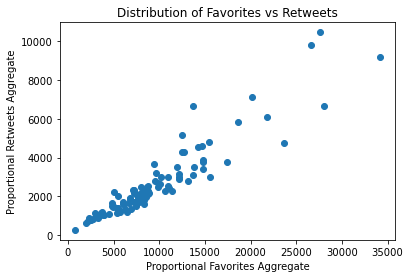

In [67]:
plt.scatter(name_stats.proportional_favorite_agg, name_stats.proportional_retweet_agg)
plt.title('Distribution of Favorites vs Retweets')
plt.xlabel('Proportional Favorites Aggregate')
plt.ylabel('Proportional Retweets Aggregate');

There is a strong positive relationship between the aggregations of the favorite and the retweet. "Zoey", "Earl", "Bo", "Sunny", "Gary", "Phil" and "Dexter" are the names who showed in the top 10 of both data.

### 1.C. Is there a relationship between these two data?

In [68]:
name_stats.sort_values(by='name_count', ascending=False).iloc[:10]

,position,name,name_count,favorite_agg,retweet_agg,proportional_favorite_agg,proportional_retweet_agg
0,0,Charlie,11,96827.0,23007.0,8802.454545,2091.545455
1,1,Lucy,11,79357.0,25640.0,7214.272727,2330.909091
2,2,Cooper,10,61311.0,15826.0,6131.100000,1582.600000
3,3,Oliver,10,66962.0,16432.0,6696.200000,1643.200000
4,4,Penny,9,91293.0,26890.0,10143.666667,2987.777778
5,5,Tucker,9,68825.0,16503.0,7647.222222,1833.666667
6,6,Winston,8,70081.0,18163.0,8760.125000,2270.375000
7,7,Sadie,8,42905.0,11075.0,5363.125000,1384.375000
8,8,Lola,8,54085.0,14696.0,6760.625000,1837.000000
9,9,Daisy,7,59587.0,14616.0,8512.428571,2088.000000


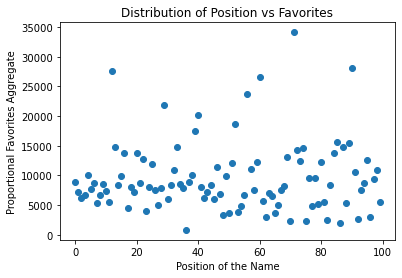

In [69]:
plt.scatter(name_stats.position, name_stats.proportional_favorite_agg)
plt.title('Distribution of Position vs Favorites')
plt.xlabel('Position of the Name')
plt.ylabel('Proportional Favorites Aggregate');

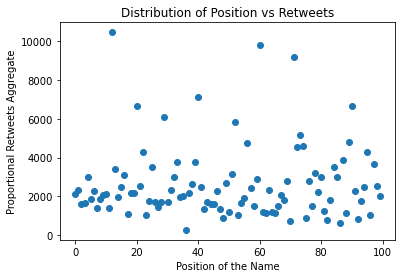

In [70]:
plt.scatter(name_stats.position, name_stats.proportional_retweet_agg)
plt.title('Distribution of Position vs Retweets')
plt.xlabel('Position of the Name')
plt.ylabel('Proportional Retweets Aggregate');

There is a weak negative relationship between the most popular name and the names with more retweets and favorites. The name "Bo" is the best colocated in both data.

### 2. Is there a source that gives higher ratings than others?
First, let's calculate the rating for each record.

In [71]:
twitter_archive_master['rating'] = twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator

In [72]:
twitter_archive_master.rating.describe()

count    2116.000000
mean        1.163789
std         3.945273
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [73]:
twitter_archive_master.rating.value_counts()

1.200      493
1.000      430
1.100      424
1.300      297
0.900      154
0.800      101
0.700       53
1.400       41
0.600       33
0.500       32
0.300       19
0.400       16
0.200       10
0.100        5
0.000        2
42.000       1
1.127        1
1.350        1
0.975        1
177.600      1
1.126        1
Name: rating, dtype: int64

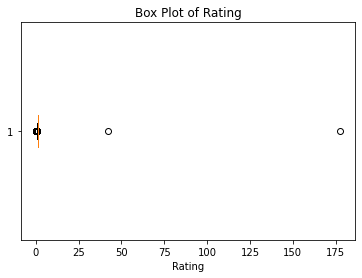

In [74]:
plt.boxplot(twitter_archive_master.rating, vert=False)
plt.title('Box Plot of Rating')
plt.xlabel('Rating');

We can see that there are two visible outlines (ratings equals 177.6 and equals 42). Let's take a closer look at those records.

In [75]:
twitter_archive_master.query('rating == 42 or rating == 177.6')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating
771,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,NaN,NaN,NaN,2387.0,4955.0,177.6
1839,670842764863651840,NaN,NaN,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,NaN,NaN,NaN,NaN,NaN,7999.0,22996.0,42.0


Because it is not a parsing issue, I decided to remove these records because they do not seem to be a typo error.

In [76]:
twitter_archive_master.drop(index=twitter_archive_master.query('rating == 42 or rating == 177.6').index, inplace=True)

In [77]:
twitter_archive_master.rating.describe()

count    2114.000000
mean        1.061011
std         0.218290
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64

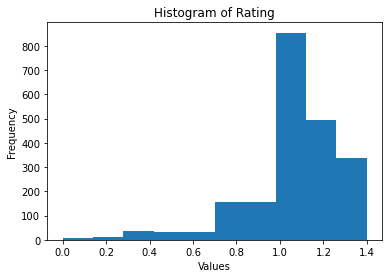

In [78]:
plt.hist(twitter_archive_master.rating)
plt.title('Histogram of Rating')
plt.xlabel('Values')
plt.ylabel('Frequency');

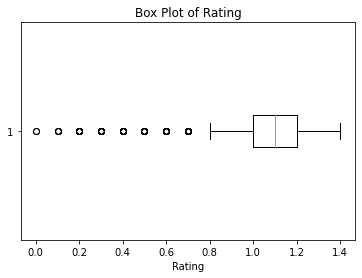

In [79]:
plt.boxplot(twitter_archive_master.rating, vert=False)
plt.title('Box Plot of Rating')
plt.xlabel('Rating');

Removing the outlines had a huge impact on the standard deviation. When plotting the box plot again, we can see that value below 0.8 is considered as outliers. Let's take a closer look.

In [80]:
twitter_archive_master.query('rating < 0.8')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating
186,848212111729840128,NaN,NaN,2017-04-01 16:35:01+00:00,Twitter for iPhone,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",https://twitter.com/dog_rates/status/848212111729840128/photo/1,6.0,10.0,Jerry,NaN,NaN,NaN,NaN,2859.0,15647.0,0.6
249,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,NaN,NaN,NaN,NaN,NaN,2896.0,21791.0,0.0
560,781661882474196992,NaN,NaN,2016-09-30 01:08:10+00:00,Twitter for iPhone,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5.0,10.0,NaN,NaN,NaN,NaN,NaN,2667.0,10288.0,0.5
588,777885040357281792,NaN,NaN,2016-09-19 15:00:20+00:00,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10.0,Wesley,NaN,NaN,NaN,NaN,1592.0,6245.0,0.3
629,771014301343748096,NaN,NaN,2016-08-31 15:58:28+00:00,Twitter for iPhone,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,https://twitter.com/dog_rates/status/771014301343748096/photo/1,7.0,10.0,NaN,NaN,NaN,NaN,NaN,1612.0,6738.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,Twitter for iPhone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6.0,10.0,NaN,NaN,NaN,NaN,NaN,41.0,101.0,0.6
2109,666051853826850816,NaN,NaN,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.0,10.0,NaN,NaN,NaN,NaN,NaN,744.0,1088.0,0.2
2111,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,NaN,NaN,NaN,38.0,94.0,0.5
2112,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,NaN,NaN,NaN,122.0,261.0,0.6


The values below 0.8 are not a parser problem and they seem to be legit. So I will stay with this data.

Let's take a look at the distribution of the source.

In [81]:
twitter_archive_master.source.value_counts()

Twitter for iPhone     1983
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

The major part of the tweets was made using a mobile device. Let's see if there a relationship between the source and the rating.

In [82]:
twitter_archive_master.groupby('source').rating.mean()

source
TweetDeck              1.110000
Twitter Web Client     1.000000
Twitter for iPhone     1.058083
Vine - Make a Scene    1.139560
Name: rating, dtype: float64

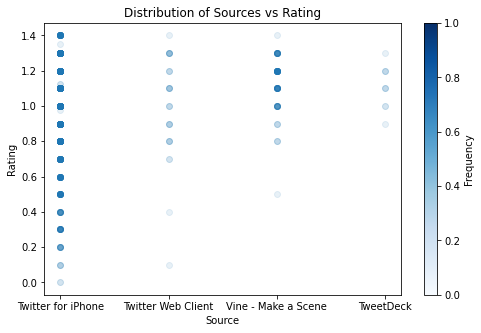

In [83]:
# Creates normalizer to change the colorbar. The darker dots are more frequent
norm = plt.Normalize(0,1)
cmap = plt.cm.get_cmap('Blues')

plt.figure(figsize=(8, 5))
plt.scatter(twitter_archive_master.source, twitter_archive_master.rating, alpha=0.1)
plt.title('Distribution of Sources vs Rating')
plt.xlabel('Source')
plt.ylabel('Rating')
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label='Frequency');

The "TweetDeck" and "Vine" are the source that has a rating greater than the mean of the database. We can see that tweets sent by the "TweetDeck" are way less frequent than those sent by "Vine".

### 3. Does a higher rating tend to have more likes and retweets?

In [84]:
twitter_archive_master.groupby('rating')[['retweet_count', 'favorite_count']].mean()

,retweet_count,favorite_count
rating,,
0.000,1590.000000,12302.000000
0.100,2128.000000,5081.400000
0.200,1051.300000,1953.200000
0.300,798.210526,2091.684211
0.400,869.187500,2247.125000
0.500,896.187500,2331.187500
0.600,862.909091,2368.121212
0.700,892.641509,2640.528302
0.800,729.029703,2075.772277


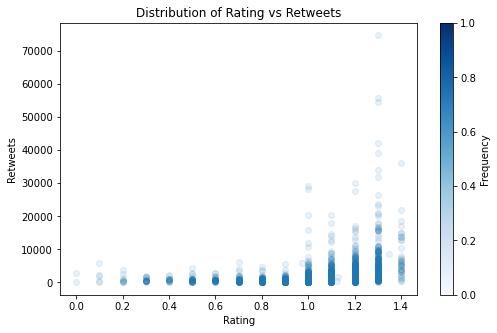

In [85]:
plt.figure(figsize=(8, 5))
plt.scatter(twitter_archive_master.rating, twitter_archive_master.retweet_count, alpha=0.1)
plt.title('Distribution of Rating vs Retweets')
plt.xlabel('Rating')
plt.ylabel('Retweets')
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label='Frequency');

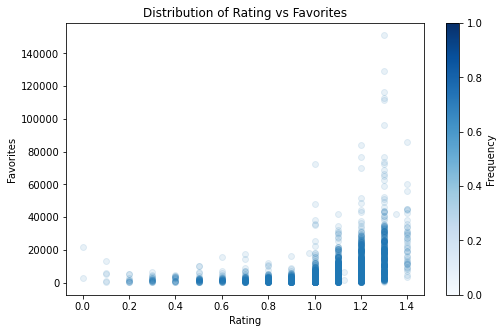

In [86]:
plt.figure(figsize=(8, 5))

plt.scatter(twitter_archive_master.rating, twitter_archive_master.favorite_count, alpha=0.1)
plt.title('Distribution of Rating vs Favorites')
plt.xlabel('Rating')
plt.ylabel('Favorites')
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label='Frequency');

Based on the distribution, there is a moderated positive relationship between the rating and the favorite and retweet count.

---
## Conclusion

In this analysis over the tweets of WeRateDogs, we could conclude the following:
1. "Lucy" and "Charlie" are the most popular names, but "Zoey", "Earl", "Bo", "Sunny", "Gary", "Phil" and "Dexter" are the names who had more retweets and favorites.
2. "Vine" and "TweetDeck" were the source that proportionally had higher ratings when compared with "Twitter Web Client" and "Twitter for iPhone".
3. A higher rating tends to have a higher number of favorites and retweets, but it is not a strong relationship.

This database is dirty and had a lot of other cleaning issues that could be made to improve future analysis (for instance, try to fill the null values in the name).

Even with this analysis, there still space for more interesting question in this database, like using the image predictions to answer "is there a dog breed who tend to have more retweets, favorite and a bigger rating?".